In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from collections import OrderedDict  #保持Key的顺序
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt # 画图用
import pickle  # 打包

plt.style.use('ggplot')  # 设置图表风格
import warnings  
warnings.filterwarnings('ignore') 



In [21]:
pkl_file = open('factor.pkl', 'rb')
mom_factor = pd.read_pickle(pkl_file)
pkl_file.close()
mom_factor

{'10D':                          returns      risk  momentum
 date       codes                                    
 2022-01-04 000001.XSHE  0.993034  0.025034 -0.887088
            000002.XSHE  0.965046  0.025034 -0.915076
            000006.XSHE  1.270476  0.025034 -0.609646
            000007.XSHE  0.963145  0.025034 -0.916977
            000008.XSHE  0.954545  0.025034 -0.925577
 ...                          ...       ...       ...
 2022-12-30 605580.XSHG  0.973841  0.025034 -0.906282
            605588.XSHG  0.927267  0.025034 -0.952856
            605589.XSHG  0.948752  0.025034 -0.931370
            605598.XSHG  0.879886  0.025034 -1.000237
            605599.XSHG  1.023631  0.025034 -0.856492
 
 [732776 rows x 3 columns],
 '5D':                          returns      risk  momentum
 date       codes                                    
 2022-01-04 000001.XSHE  1.019873  0.025308 -0.901605
            000002.XSHE  0.993255  0.025308 -0.928223
            000006.XSHE  1.212727  0.02

In [22]:
factor_5D=mom_factor['5D']['momentum']
factor_10D=mom_factor['10D']['momentum']

In [23]:
factor_5D=factor_5D.reset_index()
factor_10D=factor_10D.reset_index()
factor_5D.head()

,date,codes,momentum
0,2022-01-04,000001.XSHE,-0.901605
1,2022-01-04,000002.XSHE,-0.928223
2,2022-01-04,000006.XSHE,-0.708750
3,2022-01-04,000007.XSHE,-0.948773
4,2022-01-04,000008.XSHE,-0.930061


In [25]:
factor_ubl=pd.read_csv('ubl.csv')
factor_ubl.head()

,date,codes,returns,risk,upperWr,lowerWr
0,2022-01-04,000001.XSHE,1.019873,0.024861,0.282167,0.271182
1,2022-01-04,000002.XSHE,0.993255,0.024861,0.282167,0.271182
2,2022-01-04,000004.XSHE,1.000000,0.024861,0.282167,0.271182
3,2022-01-04,000005.XSHE,1.000000,0.024861,0.282167,0.271182
4,2022-01-04,000006.XSHE,1.212727,0.024861,0.282167,0.271182


In [27]:
factor_upper=factor_ubl.drop(['returns','risk','lowerWr'],axis=1)
factor_lower=factor_ubl.drop(['returns','risk','upperWr'],axis=1)
factor_lower.head()

,date,codes,lowerWr
0,2022-01-04,000001.XSHE,0.271182
1,2022-01-04,000002.XSHE,0.271182
2,2022-01-04,000004.XSHE,0.271182
3,2022-01-04,000005.XSHE,0.271182
4,2022-01-04,000006.XSHE,0.271182


In [29]:
df1=pd.merge(factor_10D,factor_5D,on=['date','codes'],how='inner')
df1.head()

,date,codes,momentum_x,momentum_y
0,2022-01-04,000001.XSHE,-0.887088,-0.901605
1,2022-01-04,000002.XSHE,-0.915076,-0.928223
2,2022-01-04,000006.XSHE,-0.609646,-0.708750
3,2022-01-04,000007.XSHE,-0.916977,-0.948773
4,2022-01-04,000008.XSHE,-0.925577,-0.930061


In [30]:
df1=df1.rename(columns={'momentum_x': 'mom_5D','momentum_y': 'mom_10D'})
df1.head()

,date,codes,mom_5D,mom_10D
0,2022-01-04,000001.XSHE,-0.887088,-0.901605
1,2022-01-04,000002.XSHE,-0.915076,-0.928223
2,2022-01-04,000006.XSHE,-0.609646,-0.708750
3,2022-01-04,000007.XSHE,-0.916977,-0.948773
4,2022-01-04,000008.XSHE,-0.925577,-0.930061


In [31]:
df1=pd.merge(factor_10D,factor_5D,on=['date','codes'],how='inner')
df1.head()

,date,codes,upperWr,lowerWr
0,2022-01-04,000001.XSHE,0.282167,0.271182
1,2022-01-04,000002.XSHE,0.282167,0.271182
2,2022-01-04,000004.XSHE,0.282167,0.271182
3,2022-01-04,000005.XSHE,0.282167,0.271182
4,2022-01-04,000006.XSHE,0.282167,0.271182


In [40]:
df1['date']=pd.to_datetime(df1['date'])
df2['date']=pd.to_datetime(df2['date'])


In [41]:
df=pd.merge(df1,df2,on=['date','codes'],how='inner')
df.head()

,date,codes,mom_5D,mom_10D,upperWr,lowerWr
0,2022-01-04,000001.XSHE,-0.887088,-0.901605,0.282167,0.271182
1,2022-01-04,000002.XSHE,-0.915076,-0.928223,0.282167,0.271182
2,2022-01-04,000006.XSHE,-0.609646,-0.708750,0.282167,0.271182
3,2022-01-04,000007.XSHE,-0.916977,-0.948773,0.282167,0.271182
4,2022-01-04,000008.XSHE,-0.925577,-0.930061,0.282167,0.271182


In [42]:
df.set_index(['date','codes'],inplace=True)
df.head()

mom_5D   mom_10D   upperWr   lowerWr
date       codes                                              
2022-01-04 000001.XSHE -0.887088 -0.901605  0.282167  0.271182
           000002.XSHE -0.915076 -0.928223  0.282167  0.271182
           000006.XSHE -0.609646 -0.708750  0.282167  0.271182
           000007.XSHE -0.916977 -0.948773  0.282167  0.271182
           000008.XSHE -0.925577 -0.930061  0.282167  0.271182

In [43]:
corr_date=df.corr()
corr_date

,mom_5D,mom_10D,upperWr,lowerWr
mom_5D,1.000000,0.756604,NaN,NaN
mom_10D,0.756604,1.000000,NaN,NaN
upperWr,NaN,NaN,NaN,NaN
lowerWr,NaN,NaN,NaN,NaN


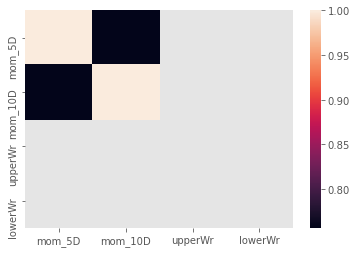

In [44]:
import seaborn as sns
ax=sns.heatmap(corr_date)